# TASK 5

## Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

## Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Load the Dataset

In [4]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv('RTA Dataset.csv')

# Display the first few rows of the dataset to check its structure
data.head()


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


##  Data Cleaning

In [5]:
# Drop rows with missing values in key columns for analysis
data_cleaned = data.dropna(subset=['Time', 'Cause_of_accident', 'Accident_severity', 'Day_of_week'])

# Convert the 'Time' column to hours (for grouping purposes)
data_cleaned['Time'] = pd.to_datetime(data_cleaned['Time'], format='%H:%M:%S').dt.hour

# Show summary of missing values after cleaning
data_cleaned.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

## Accidents by Time of Day

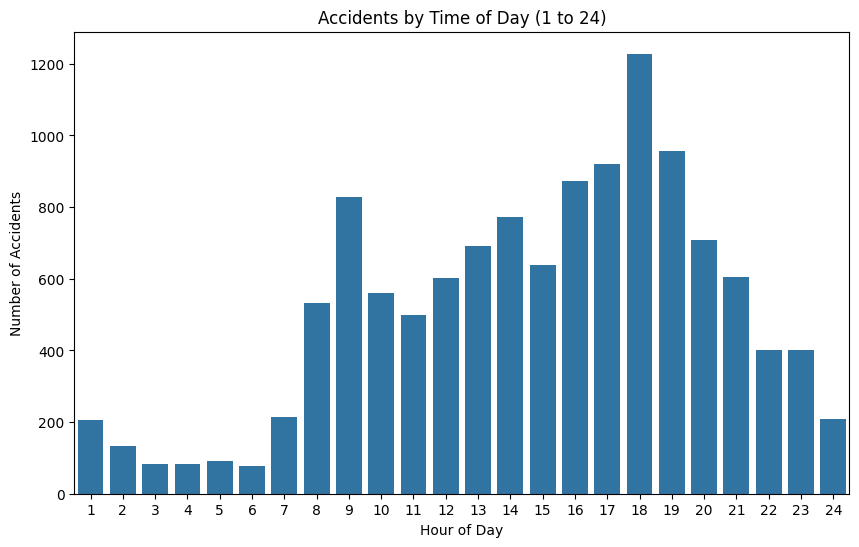

In [13]:
# Add 1 to each hour to make the range from 1 to 24
data_cleaned['Hour_adjusted'] = data_cleaned['Time'] + 1

# Create a list of hour values from 1 to 24
hours_of_day = list(range(1, 25))

# Plot accidents by time of day with hours 1 to 24
plt.figure(figsize=(10,6))
sns.countplot(x=data_cleaned['Hour_adjusted'], order=hours_of_day)
plt.title('Accidents by Time of Day (1 to 24)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()


## Accidents by Day of the Week

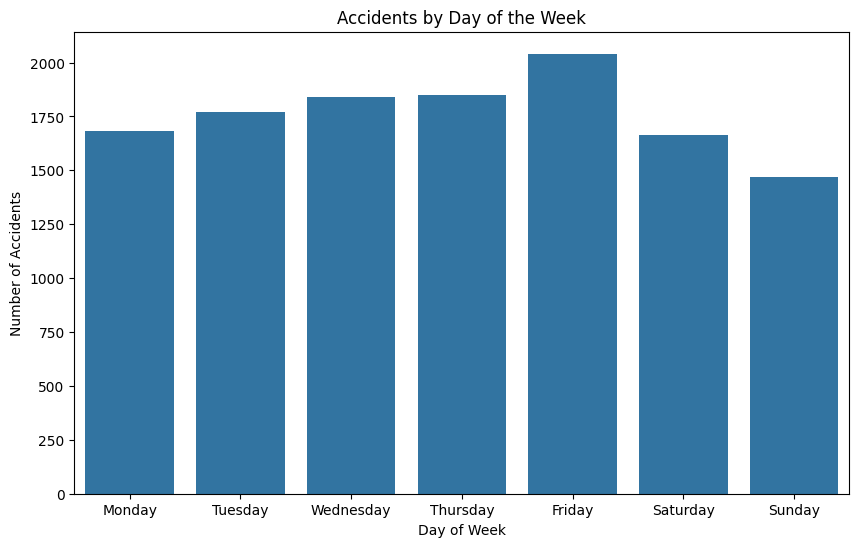

In [7]:
# Count the number of accidents by day of the week
plt.figure(figsize=(10,6))
sns.countplot(x='Day_of_week', data=data_cleaned, 
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()


## Accidents by Cause

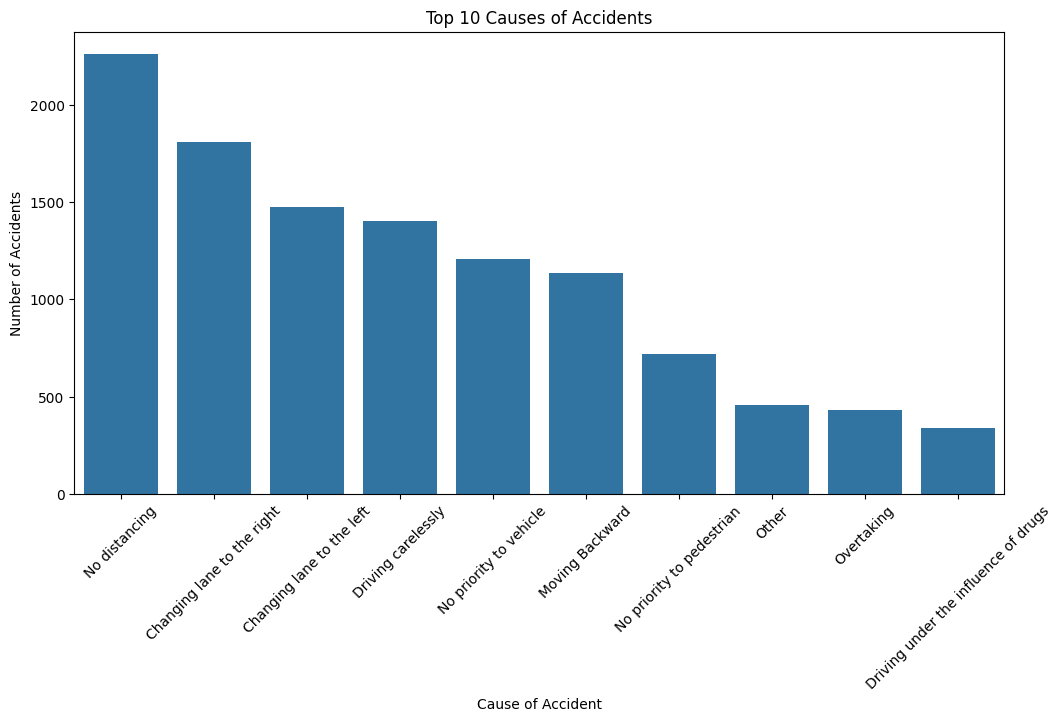

In [8]:
# Plot the top 10 causes of accidents
plt.figure(figsize=(12,6))
top_causes = data_cleaned['Cause_of_accident'].value_counts().nlargest(10)
sns.barplot(x=top_causes.index, y=top_causes.values)
plt.title('Top 10 Causes of Accidents')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

## Accident Severity Distribution

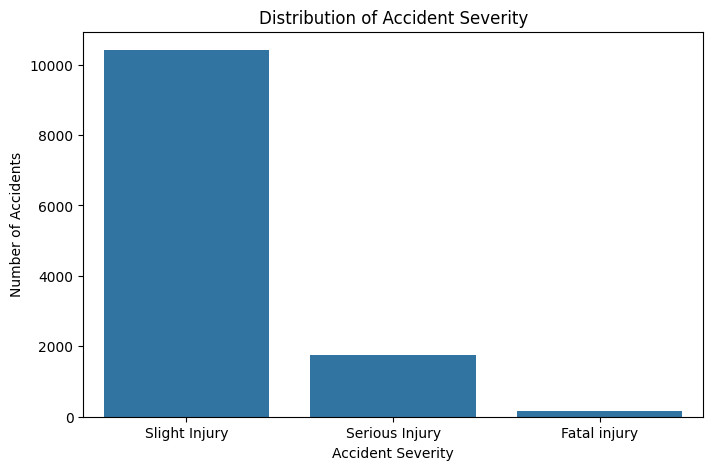

In [9]:
# Plot the distribution of accident severity
plt.figure(figsize=(8,5))
sns.countplot(x='Accident_severity', data=data_cleaned)
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.show()

## Accident Severity by Time of Day

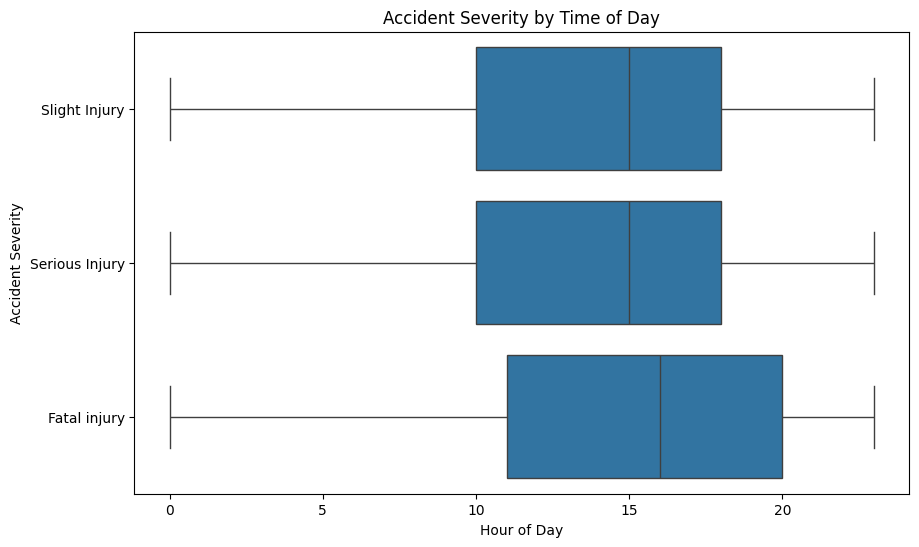

In [10]:
# Boxplot showing accident severity by time of day
plt.figure(figsize=(10,6))
sns.boxplot(x='Time', y='Accident_severity', data=data_cleaned)
plt.title('Accident Severity by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Accident Severity')
plt.show()